## Load **Dataset**

In [1]:
import pandas as pd

# Load dataset
data=pd.read_csv('data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Exploratory Data Analysis**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

### Performing univariate analysis

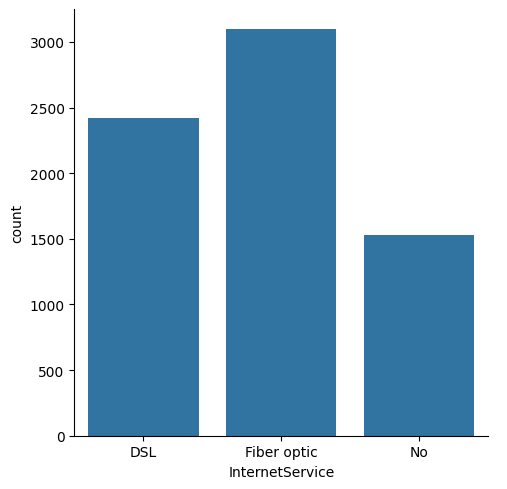

In [3]:
sns.catplot(data=data, x='InternetService', kind='count')

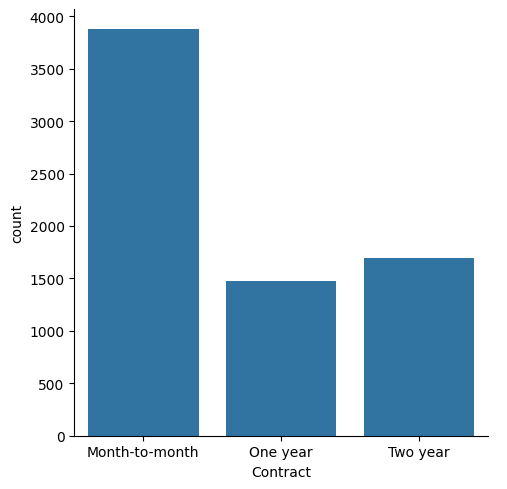

In [4]:
sns.catplot(data=data, x='Contract', kind='count')

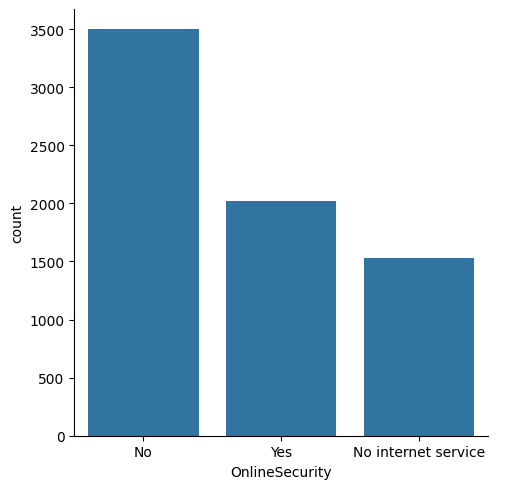

In [5]:
sns.catplot(data=data, x='OnlineSecurity', kind='count')

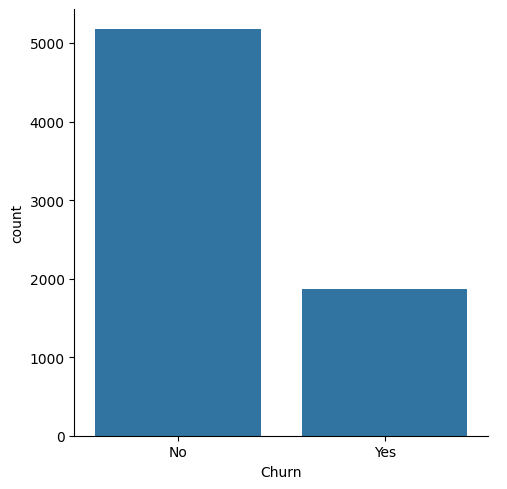

In [6]:
sns.catplot(data=data, x='Churn', kind='count')

### **Bivariate Analysis**

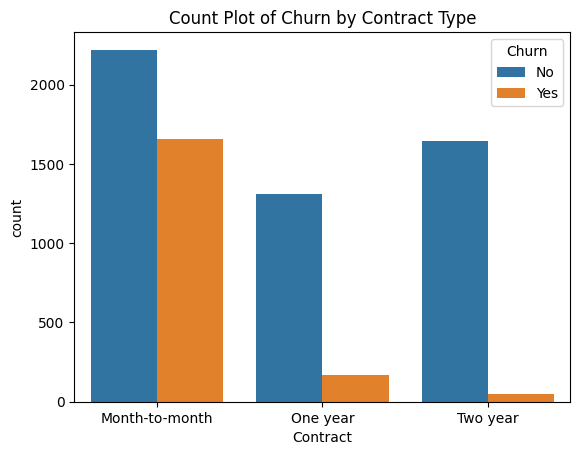

In [19]:
sns.countplot(data=data, x='Contract',hue='Churn')
plt.title('Count Plot of Churn by Contract Type')
plt.show()

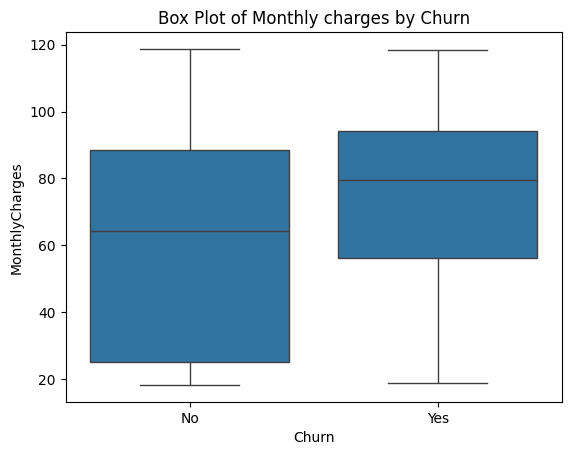

In [21]:
sns.boxplot(data=data, x='Churn', y='MonthlyCharges')
plt.title('Box Plot of Monthly charges by Churn')
plt.show()

This boxplot compares Monthly charges for customers who stayed with the service(labeled under Churn as 'No') and those who left the service(labeled under churn as 'Yes')

1. The box for both groups(Yes and No) shows the typical range of monthly pay that customers pay.

2. The thick line inside the box represents the median monthly charge. We can see that the customers who left(Yes) has slightly higher median monthly charge than those who stayed(No).

3. The boxes and whiskers show the spread of charges.

4. The customers who left generally have a high monthly charges compared to those stayed.

5. Overall, this suggests that higher charges might be linked to customers leaving the service.


This chart suggest the trend where customers with high monthly charges are more likely to leave. This could mean that reducing charges and offering more value at higher prices might help retain the customers.

## **Data Preprocessing**

### Handle missing value


In [59]:
blank_counts=data.applymap(lambda x: x=="" or x==" ").sum()

column_with_blanks=blank_counts[blank_counts>0]
print(column_with_blanks)



TotalCharges    11
dtype: int64


<ipython-input-59-24c3d5287c64>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  blank_counts=data.applymap(lambda x: x=="" or x==" ").sum()


In [61]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'], errors='coerce')

data['TotalCharges'].fillna(data['TotalCharges'].median())

print(data['TotalCharges'].isnull().sum())

0


In [62]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### Finding outliers

In [63]:
# Removing outlier using IQR

Q1=data['MonthlyCharges'].quantile(0.25)
Q3=data['MonthlyCharges'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
data=data[(data['MonthlyCharges']>=lower_bound) & (data['MonthlyCharges']<=upper_bound)]

In [64]:
data.count()

,0
customerID,7043
gender,7043
SeniorCitizen,7043
Partner,7043
Dependents,7043
tenure,7043
PhoneService,7043
MultipleLines,7043
InternetService,7043
OnlineSecurity,7043


dropping customer ID

In [65]:
data1=data.drop(['customerID'], axis=1)

One hot encoding categorical variables

In [66]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
enc=OneHotEncoder(sparse_output=False)
categorical_Column=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
encoded_data_array=enc.fit_transform(data1[categorical_Column])


In [68]:
encoded_data_array

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [69]:
encoded_df=pd.DataFrame(encoded_data_array,columns=enc.get_feature_names_out(categorical_Column))

In [70]:
data1=data1.drop(categorical_Column, axis=1)

In [71]:
data2=pd.concat([encoded_df,data1],axis=1)

In [72]:
data2.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0,1,29.85,29.85,No
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,34,56.95,1889.50,No
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0,2,53.85,108.15,Yes
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0,45,42.30,1840.75,No
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0,2,70.70,151.65,Yes


Feature Scaling and Transformation

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
data2[['tenure','MonthlyCharges','TotalCharges']]=StandardScaler().fit_transform(data2[['tenure','MonthlyCharges','TotalCharges']])

In [75]:
data2.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0,-1.277445,-1.160323,-0.994242,No
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,0.066327,-0.259629,-0.173244,No
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0,-1.236724,-0.362660,-0.959674,Yes
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0,0.514251,-0.746535,-0.194766,No
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0,-1.236724,0.197365,-0.940470,Yes


In [79]:
data2['Churn']=data2['Churn'].map({'Yes':1,'No':0})

In [80]:
data2.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0,-1.277445,-1.160323,-0.994242,0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,0.066327,-0.259629,-0.173244,0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0,-1.236724,-0.362660,-0.959674,1
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0,0.514251,-0.746535,-0.194766,0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0,-1.236724,0.197365,-0.940470,1


## Feature Engineering and Selection

### Using Recursive Feature Elimination to select the most relevant features.

In [83]:
# Check the number of features in the dataset
num_features = data2.drop('Churn', axis=1).shape[1]

In [88]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Feature Selection
model=RandomForestClassifier()
rfe=RFE(model,n_features_to_select=min(25, num_features))
rfe.fit(data2.drop('Churn',axis=1),data2['Churn'])

selected_features=data2.drop('Churn',axis=1).columns[rfe.support_]
print(selected_features)


Index(['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_Yes', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No',
       'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'Contract_Month-to-month', 'Contract_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')


## **Address Class Imbalance**

In [89]:
from imblearn.over_sampling import SMOTE

In [90]:
# Handle class imbalance

smote = SMOTE()
X,y=data2.drop('Churn',axis=1),data2['Churn']
X_resampled,y_resampled =smote.fit_resample(X,y)

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Evaluate
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1021
           1       0.87      0.87      0.87      1049

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070

ROC-AUC: 0.9331955530615885
